In [ ]:
whisky.txt 에서 flavor데이터를 이용하여, region을 분류하는 다음과 같은 모델을 만들어

그 성능을 출력하라. 

단, 학습:테스트 = 8:2로 분할하라.

데이터 모델은 다음 중에 하나를 사용하라. 

 - decision tree

 - K-NN

o Model 및 설정 값: K-NN(n_neighbors=7)

o 정확도(accuracry): 0.7 = (맞춘 갯수/ 테스트 데이터 갯수)

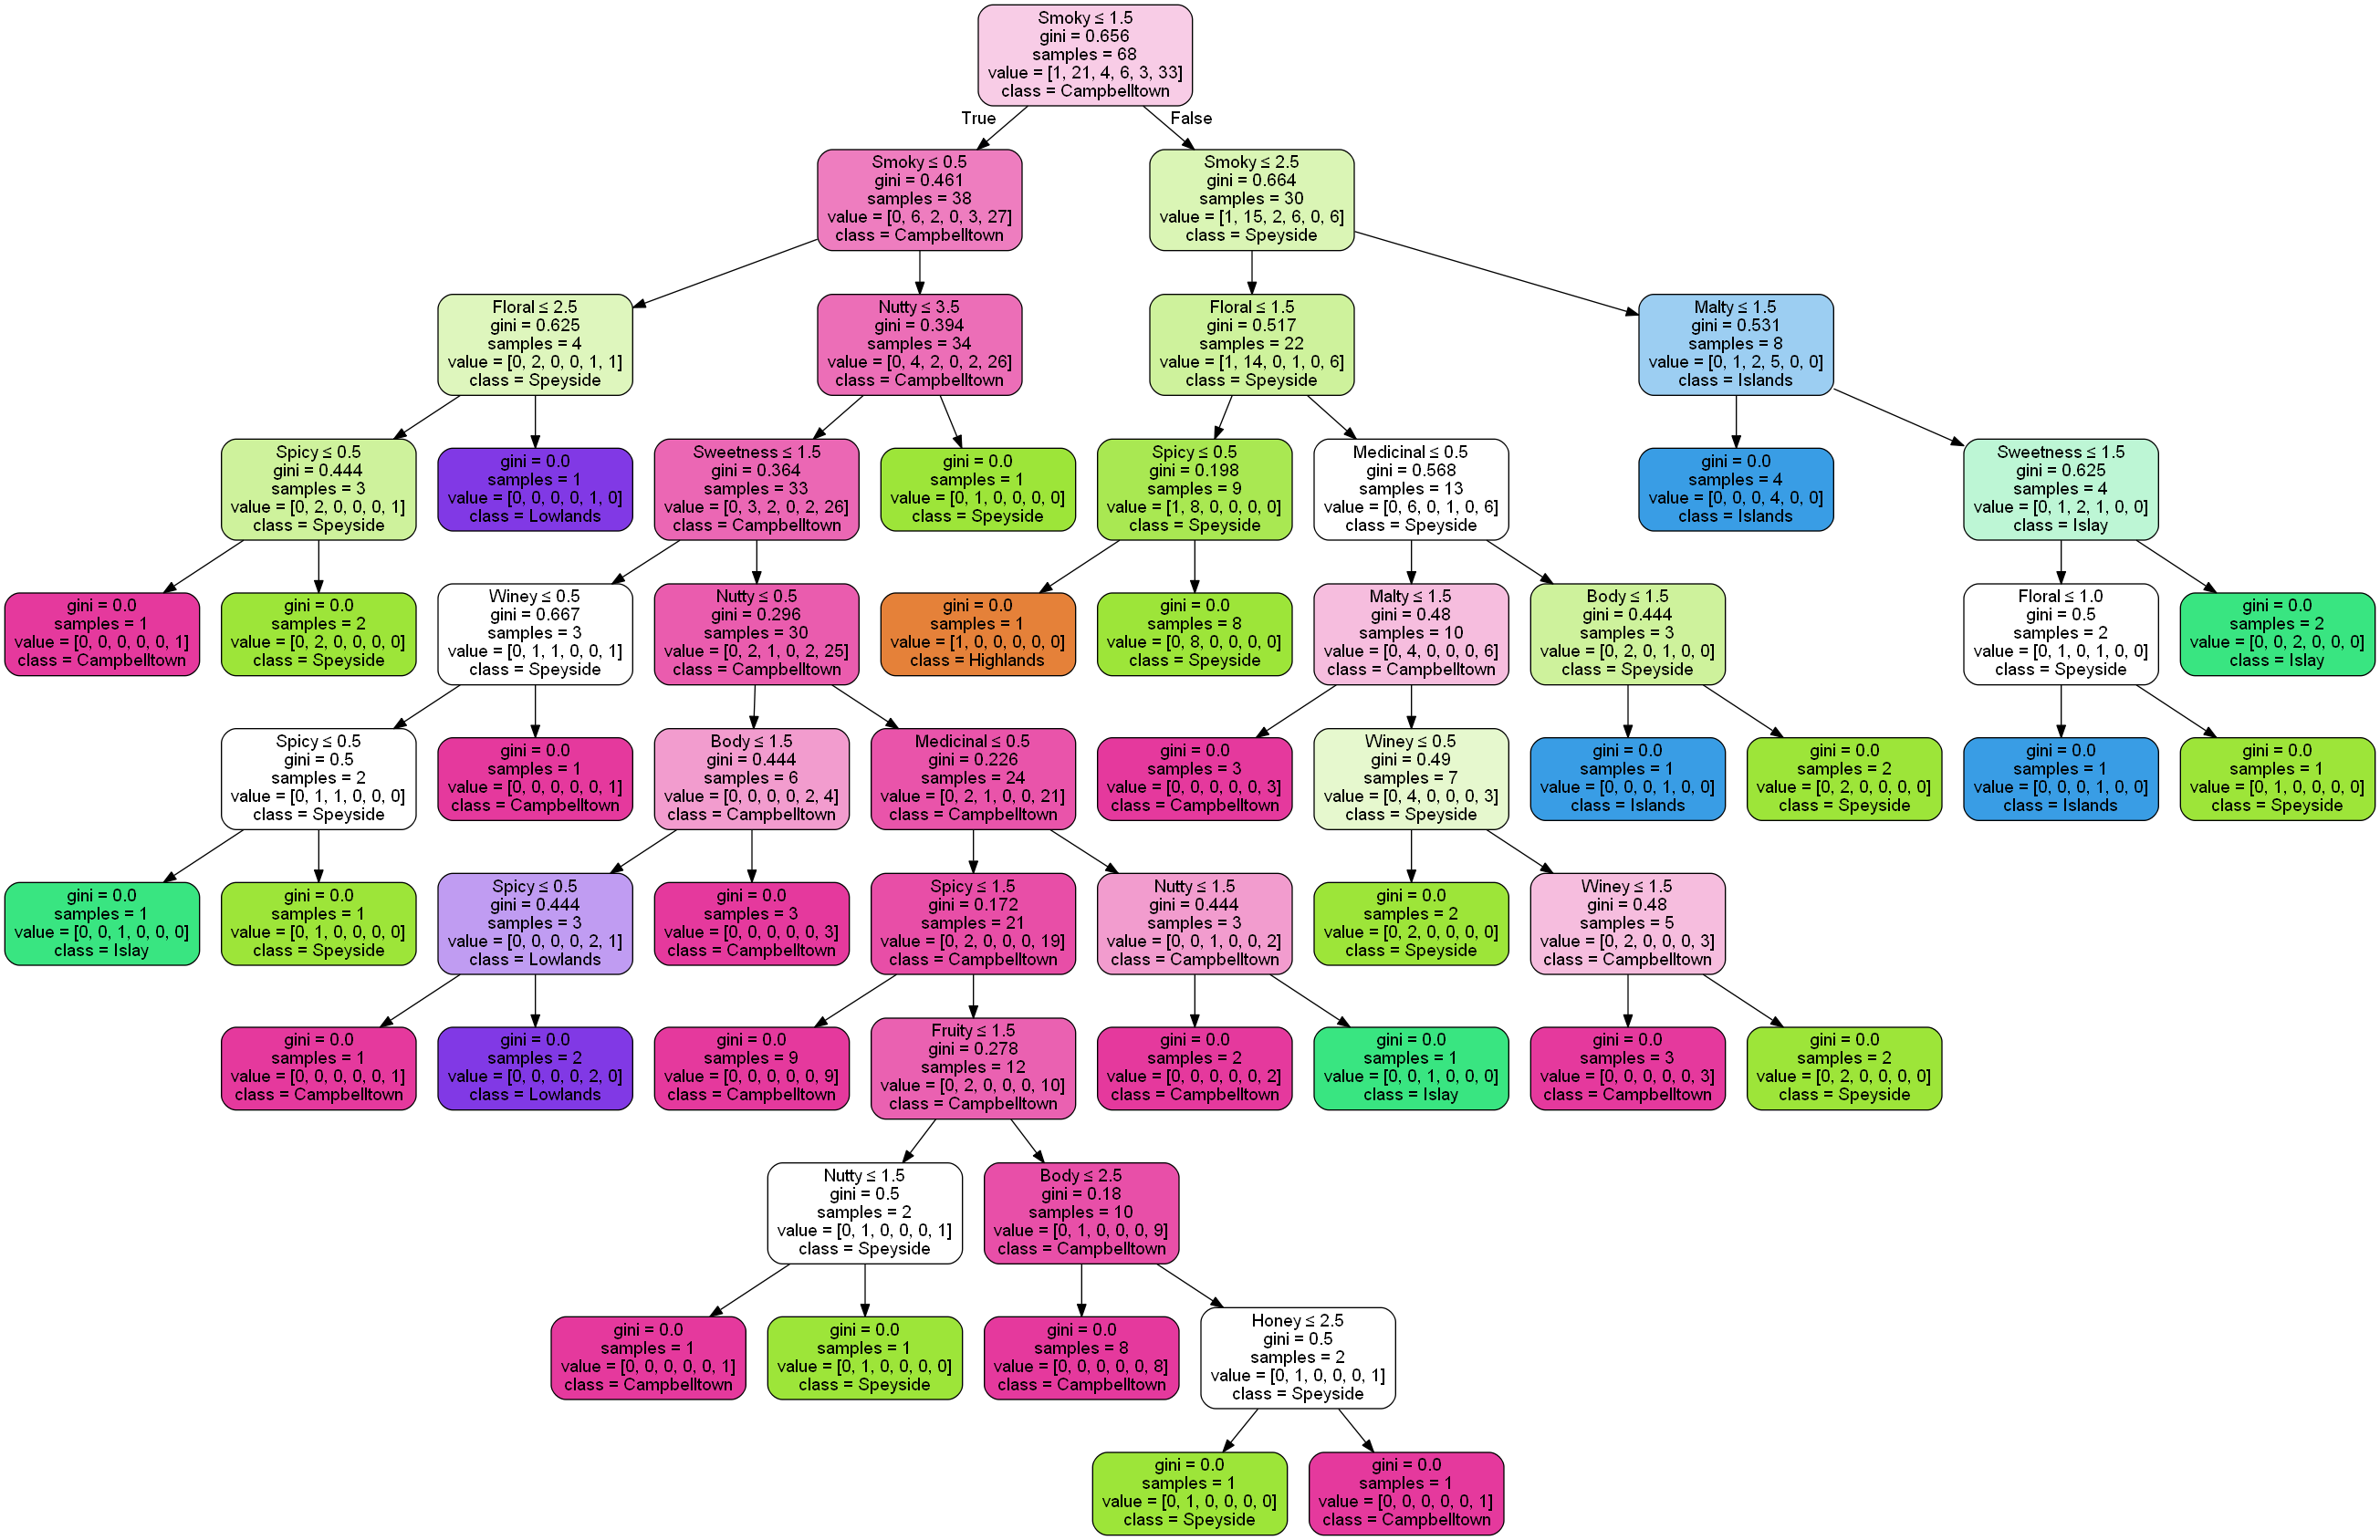

In [65]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
import graphviz

whisky = pd.read_csv("whiskies.txt")
whiskies = pd.DataFrame(whisky)
flavors = whisky.iloc[:, 2:14]
corr_flavors = pd.DataFrame.corr(flavors)

region = pd.read_csv("regions.txt")
regions = pd.DataFrame(region)
regions.columns = ['region']
whiskies.insert(1, 'region', regions)

features = whiskies
target = whiskies[['region']]

feature_cols = flavors.columns.values
X = whiskies[feature_cols]
y = target.region

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)

from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file = dot_data, special_characters=True,
                filled = True, rounded = True, feature_names = feature_cols, 
                class_names=['Highlands', 'Speyside', 'Islay', 'Islands', 'Lowlands', 'Campbelltown'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('whiskies.png')
Image(graph.create_png())

In [62]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
import graphviz

whisky = pd.read_csv("whiskies.txt")
whiskies = pd.DataFrame(whisky)
flavors = whisky.iloc[:, 2:14]

region = pd.read_csv("regions.txt")
regions = pd.DataFrame(region)
regions.columns = ['region']
whiskies.insert(1, 'region', regions)

features = whiskies
target = whiskies[['region']]

feature_cols = flavors.columns.values
X = feature_cols
y = target.region

print(target.region.unique())

['Highlands' 'Speyside' 'Islay' 'Islands' 'Lowlands' 'Campbelltown']
